<style>

</style>
the style section


<h1><center>Electronic nose substance response clustering</center></h1>

<p>


In [1]:
""" Electronic Nose: Faraz Hossein-Babaei   2016-11-7 ~ ... """
""" Data reading segment """

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipy_table
import warnings as wrn
import IPython.display as dp
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import matplotlib.patches as mpatches

CLR_MAP = plt.cm.Set1   # Color map to use for all plots. Set1, Set3, Set2, Dark2, Accent
CLR_DENOM = 8.         # To divide by to assign individual colors to subplots


def read_edible_file(file_nm, col_pre, col_idxs):
    """ Helps make file reading below brief in code. Assumes fixed param as specified in def """
    col_names = [col_pre + str(i) for i in range(len(col_idxs))]   # prefix + {0,1,2,...}
    return pd.read_csv(file_nm, header=None, skiprows=1, nrows=300, names=col_names, \
                       usecols=col_idxs, dtype=np.float64)


lemons_nms = ["Mahram","Natural 1","Yek o yek","Natural 2"]
milks_nms = ["Natural 1","Taravat","Kaleh","Natural 2"]
orangs_nms = ["North 1","Saanich","Rani","Organic Saanich","North 2","South","North 3"]
# Read tables for each substance subject to experiment with e-nose
#lemons:
lmon1 = read_edible_file("res_data/lemons.csv", "Mhrm ", [0,1,2,3])
lmon2 = read_edible_file("res_data/lemons.csv", "Ntr1 ", [4,5,6,7])
lmon3 = read_edible_file("res_data/lemons.csv", "YkYk ", [8,9,10,11])
lmon4 = read_edible_file("res_data/lemons.csv", "Ntr2 ", [12,13,14,15])
#milks 1:
mlk11 = read_edible_file("res_data/milks.csv", "Ntr1 ", list(range(10)))
mlk12 = read_edible_file("res_data/milks.csv", "Trvt ", list(range(10,20)))
mlk13 = read_edible_file("res_data/milks.csv", "Kleh ", list(range(20,30)))
mlk14 = read_edible_file("res_data/milks.csv", "Ntr2 ", list(range(30,40)))
#milks 2:
mlk21 = read_edible_file("res_data/milks_2.csv", "Ntr1 ", list(range(10)))
mlk22 = read_edible_file("res_data/milks_2.csv", "Trvt ", list(range(10,20)))
mlk23 = read_edible_file("res_data/milks_2.csv", "Kleh ", list(range(20,30)))
mlk24 = read_edible_file("res_data/milks_2.csv", "Ntr2 ", list(range(30,40)))
#oranges:
orng1 = read_edible_file("res_data/oranges.csv", "Nor1 ", [0,1,2,3])
orng2 = read_edible_file("res_data/oranges.csv", "Snch ", [4,5,6,7])
orng3 = read_edible_file("res_data/oranges.csv", "Rani ", [8,9,10,11])
orng4 = read_edible_file("res_data/oranges.csv", "OrgS ", [12,13,14,15])
orng5 = read_edible_file("res_data/oranges.csv", "Nor2 ", [16,17,18,19])
orng6 = read_edible_file("res_data/oranges.csv", "Sout ", [20,21,22,23])
orng7 = read_edible_file("res_data/oranges.csv", "Nor3 ", [24,25,26,27])

# TODO: Possibly combine into groups. pd.concat([df1,df2], axis=1) . Depends on which shortens code
#dp.display (mlk22.iloc[200:220,:])
lemons = [lmon1, lmon2, lmon3, lmon4]
milks1 = [mlk11, mlk12, mlk13 ,mlk14]
milks2 = [mlk21, mlk22, mlk23 ,mlk24]
orangs = [orng1, orng2, orng3, orng4, orng5, orng6, orng7]

df_lists_list = [lemons, milks1, milks2, orangs]


In [2]:
""" Plot function definition """

def plot_df_list (ax, df_list, df_names, ttl, x_lbl, y_lbl, clrmp, ln_styl, ln_wd, atten):
    
    font = {'font.family':'Arial', 'font.weight':'normal', 'font.size':22}
    plt.rcParams.update(font)

    clrs_dict = {}   # other color maps: brg, spectral, Accent, Paired, gnuplot, bone, hsv, jet
    # matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html
    num_plots = len(df_list)
    cnt = 0
    for i,df in enumerate(df_list):   # Building dict of colors for all unique df columns
        cur_num = 1.0*cnt / CLR_DENOM #num_plots
        if cur_num > 1: cur_num -= 1
        clrs_dict[i] = clrmp(cur_num)
        cnt += 1
    
    proxies = []
    for i,df in enumerate(df_list):
        # Using a proxy list for grouping legend colors for substance groups, not sequentially. Find on Stack overflow, quote url
        proxy, = plot_df (ax, df, ttl, x_lbl, y_lbl, clrs_dict[i], ln_styl, ln_wd, atten)
        proxies.append (proxy)
    
    ax.legend (proxies, df_names, ncol=1, loc='best', fontsize=16, columnspacing=1.5, \
               labelspacing=0.5, handletextpad=0.5, handlelength=1.5, fancybox=True, shadow=True)
    
    return ax



def plot_df (ax, df, ttl, x_lbl, y_lbl, clr, ln_styl, ln_wd, atten):
    """ Plot DataFrame for each column as a curve. """
    
    for col in df:
        this_plt = ax.plot( df[col], color=clr, linewidth=ln_wd, linestyle=ln_styl, alpha=atten)
    
    plt.suptitle(ttl, fontsize=36)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
#    plt.ylim(bottom=0)
#    plt.xlim(df.columns[0], df.columns[-1])
#    plt.xticks(df.columns, x_tick_lbls, rotation='vertical')
    
    return this_plt #(ax, clrs_dict)


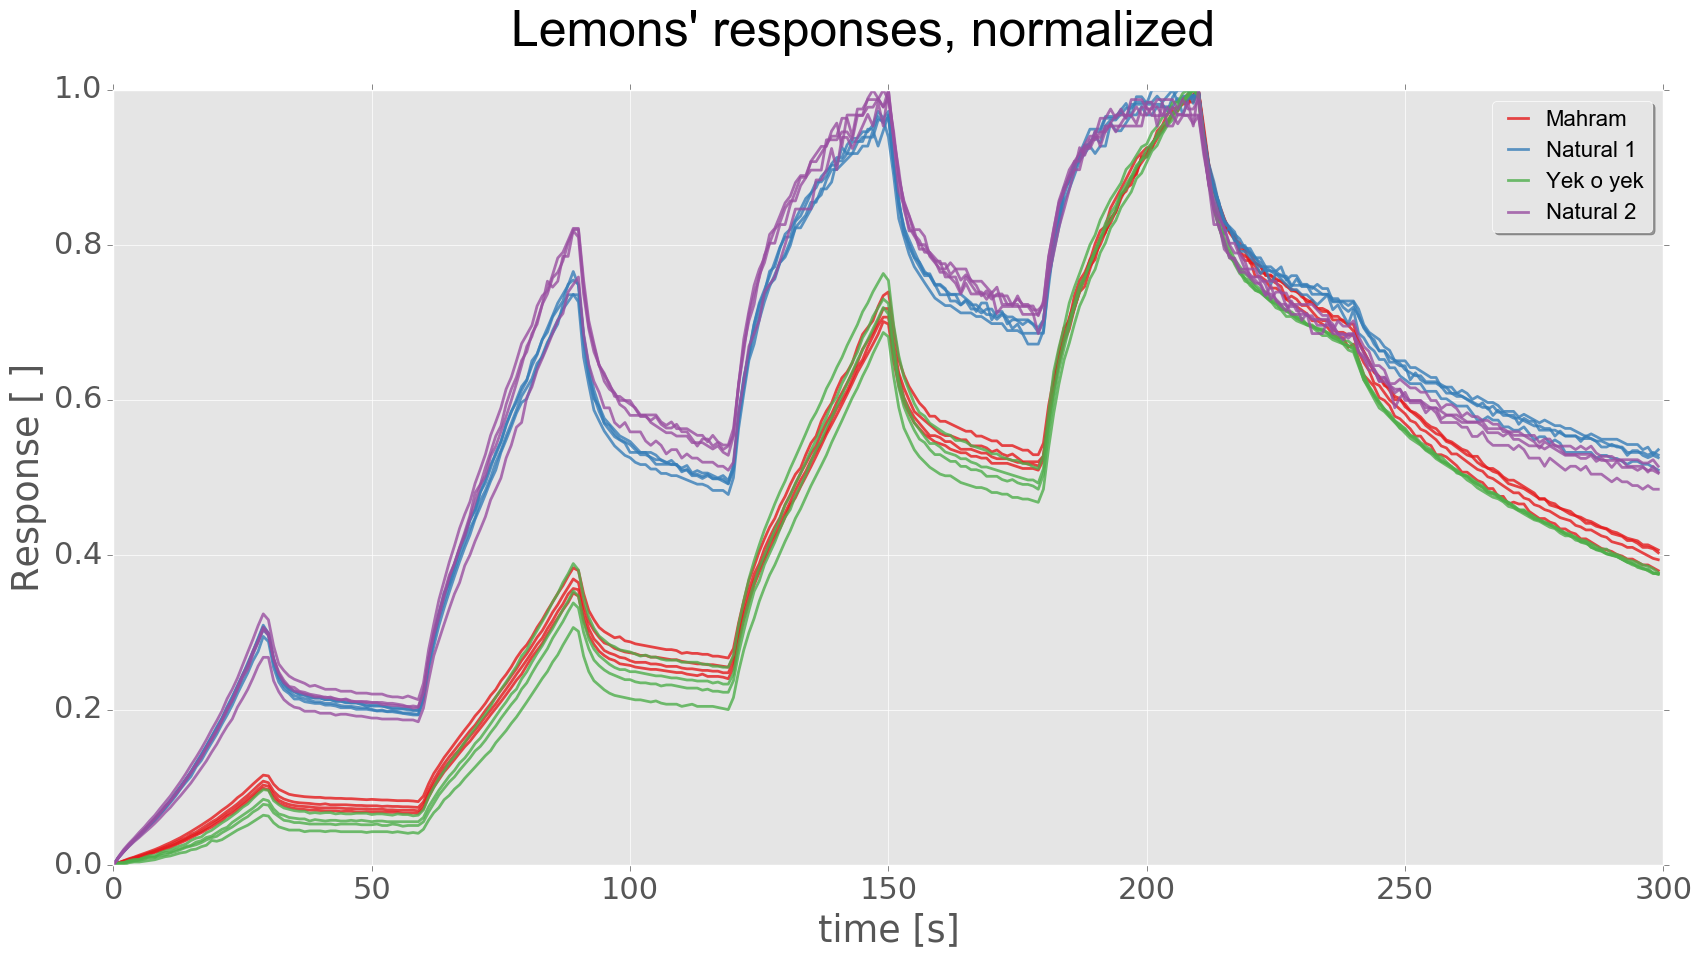

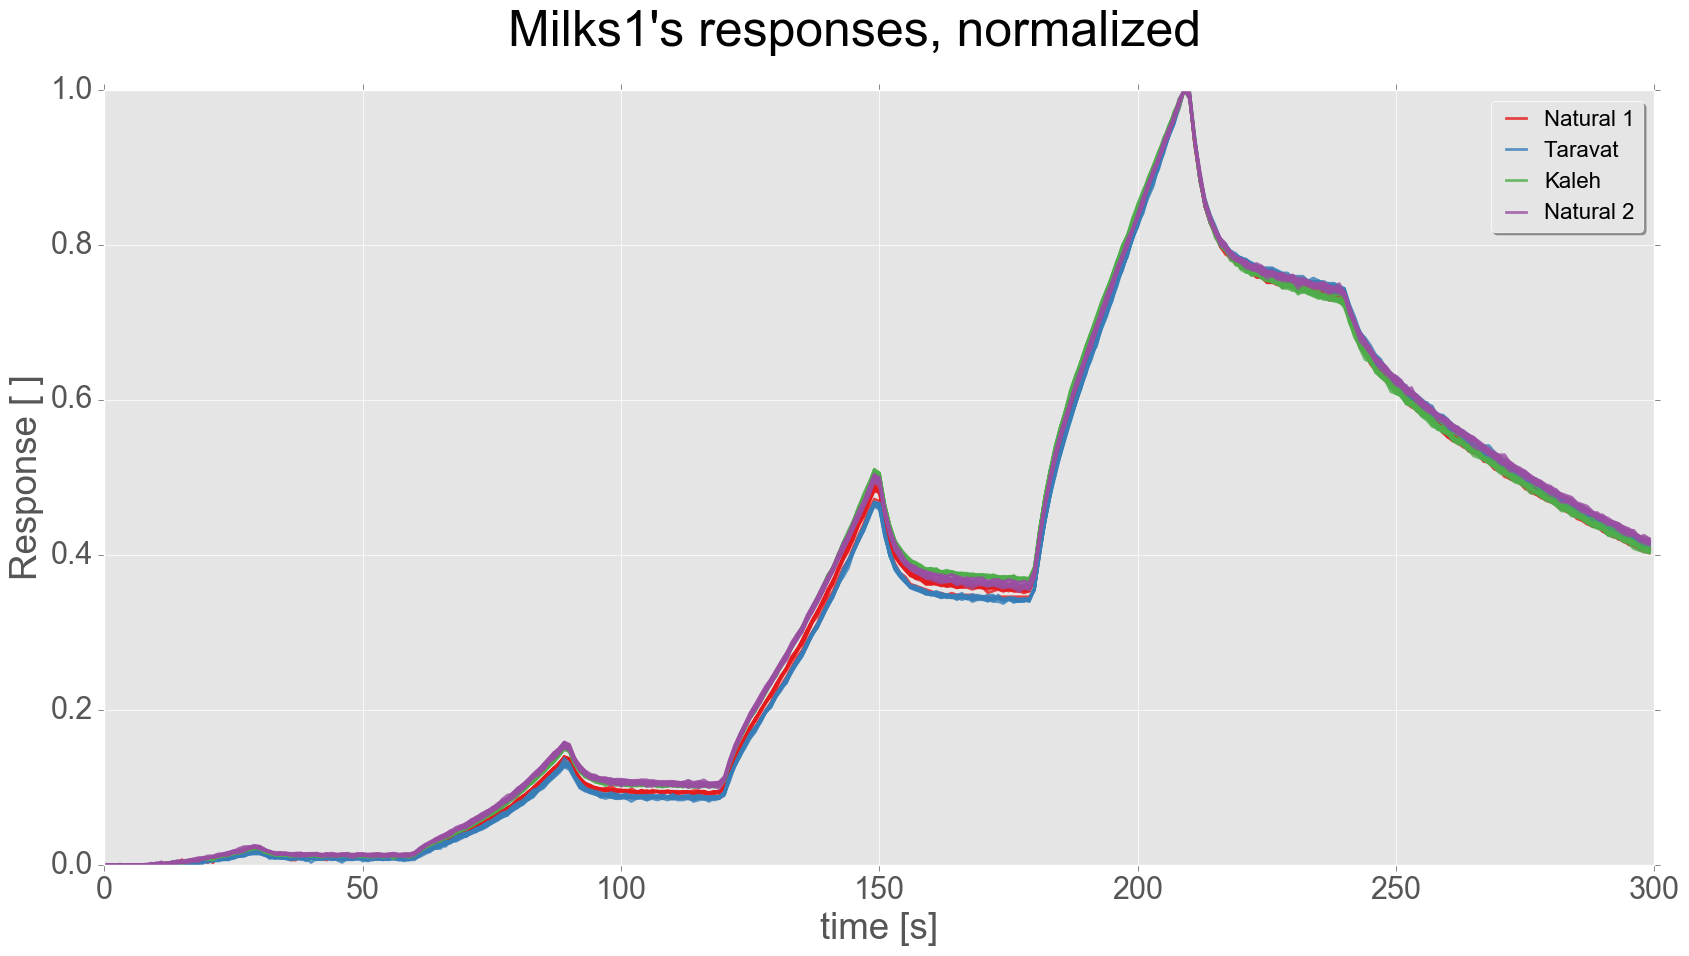

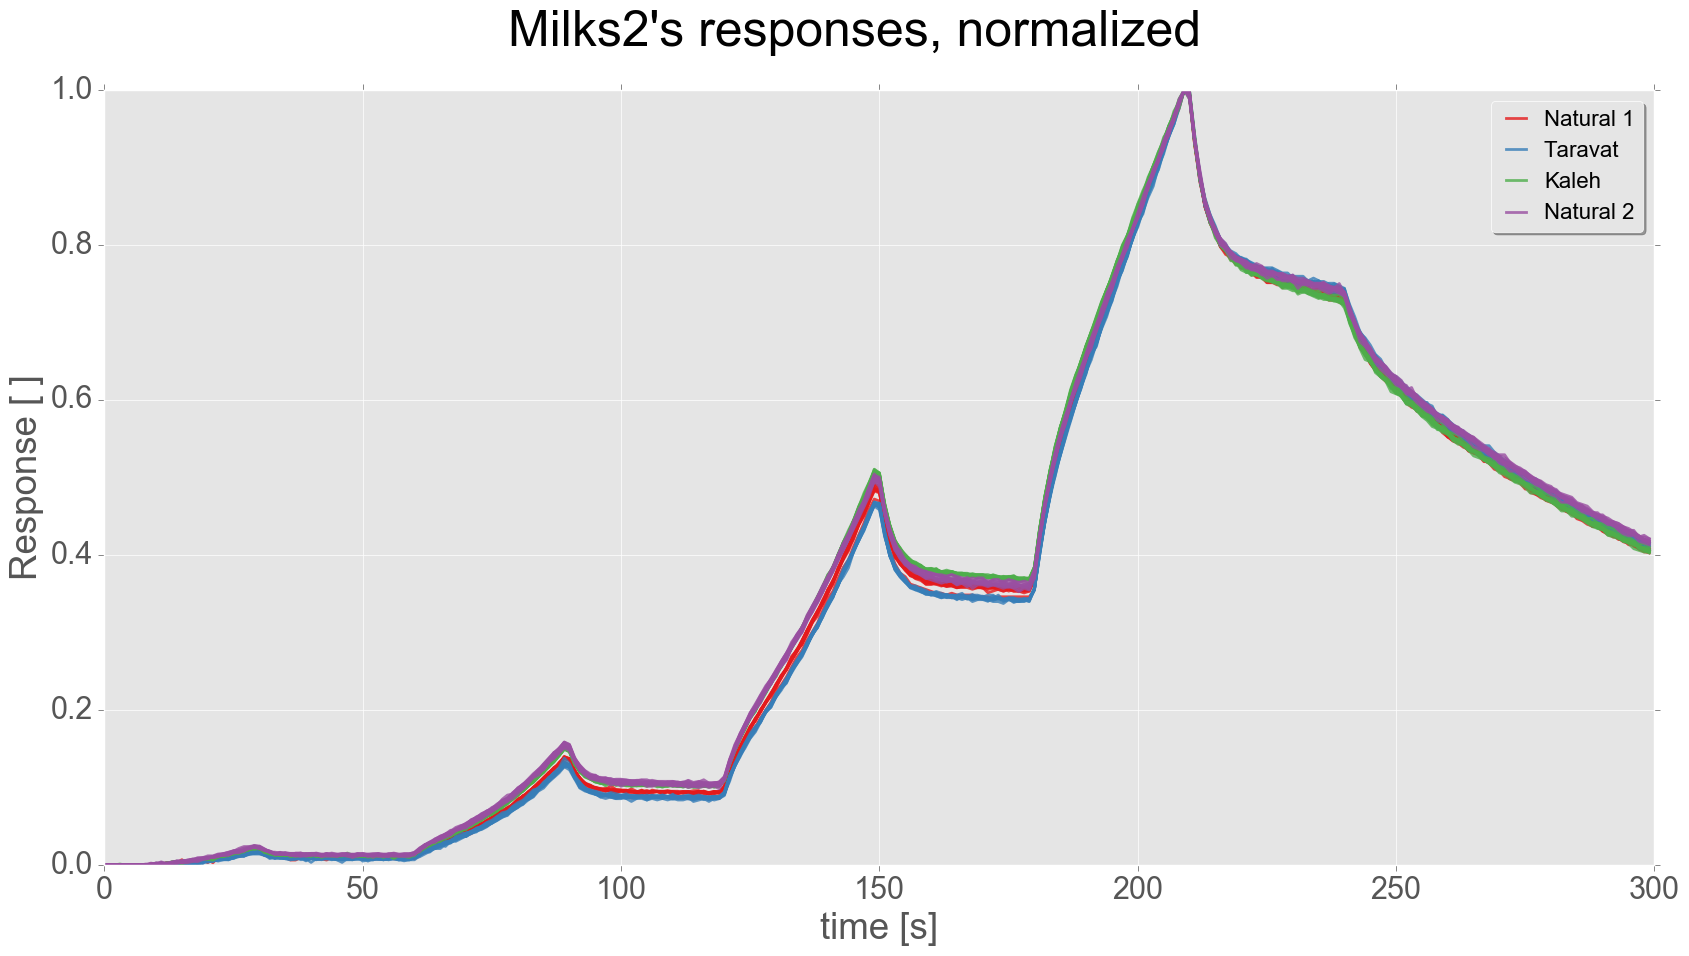

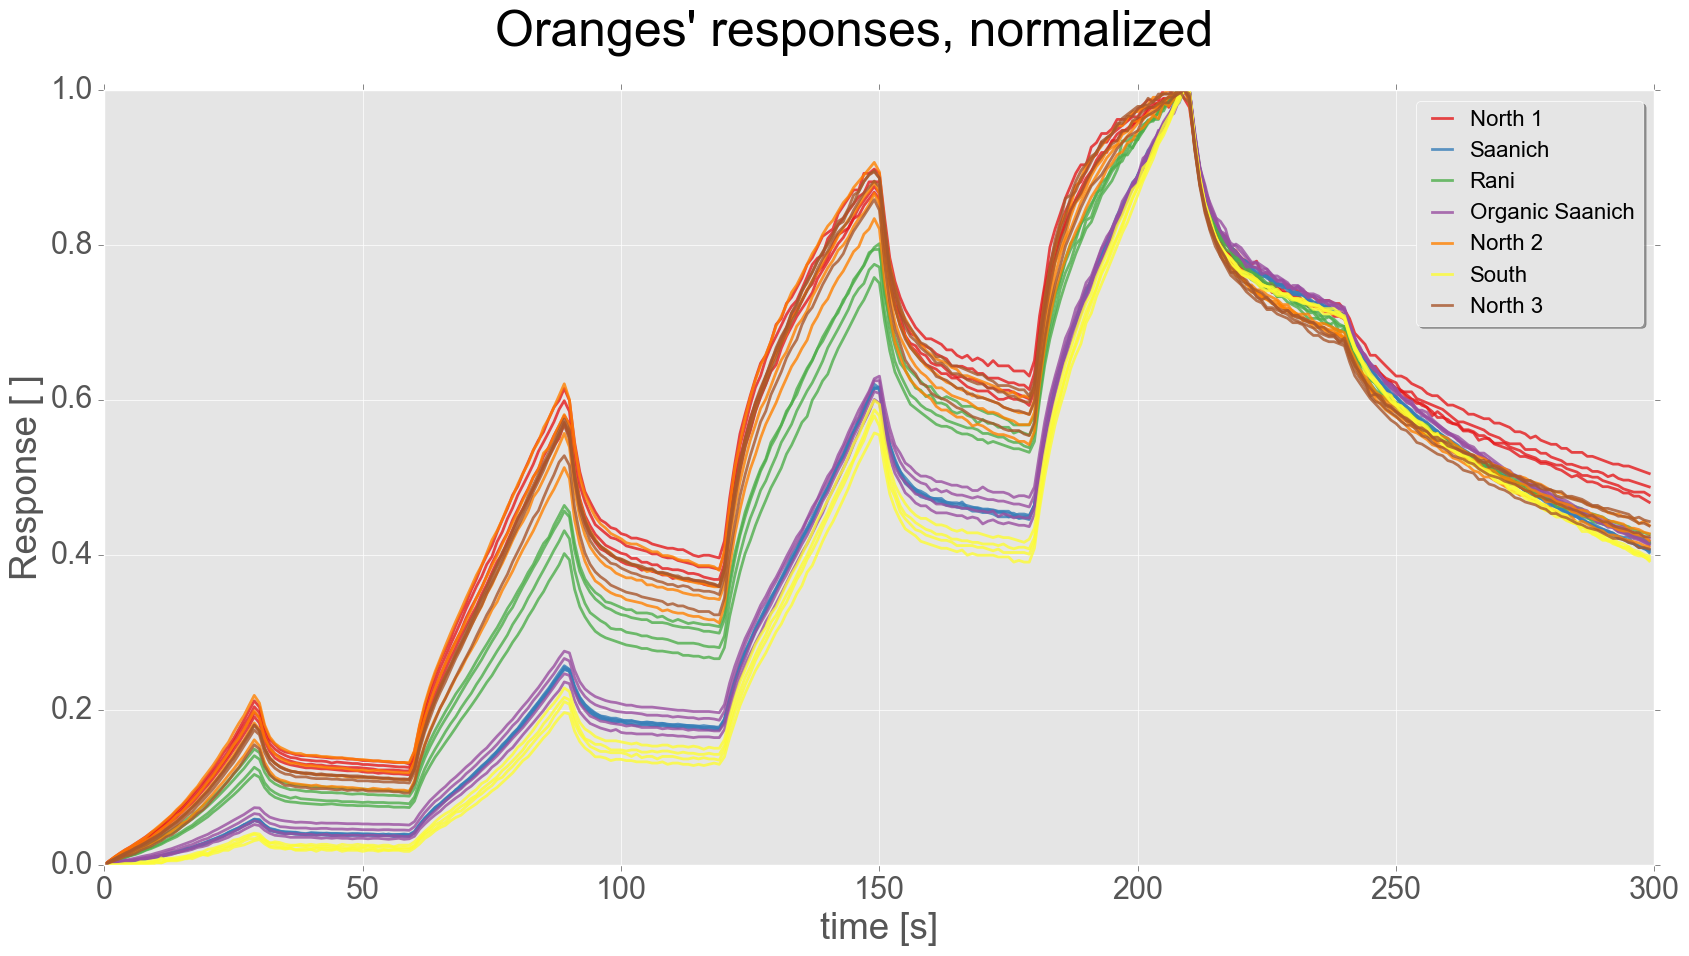

In [3]:
""" Plot to see relationship and how the data's already normalized. Maxs seem to match """

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plot_df_list (ax, lemons, lemons_nms, "Lemons' responses, normalized", "time [s]", "Response [ ]", \
         CLR_MAP, '-', 2.0, 0.8)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plot_df_list (ax, milks1, milks_nms, "Milks1's responses, normalized", "time [s]", "Response [ ]", \
         CLR_MAP, '-', 2.0, 0.8)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plot_df_list (ax, milks2, milks_nms, "Milks2's responses, normalized", "time [s]", "Response [ ]", \
         CLR_MAP, '-', 2.0, 0.8)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plot_df_list (ax, orangs, orangs_nms, "Oranges' responses, normalized", "time [s]", "Response [ ]", \
         CLR_MAP, '-', 2.0, 0.8)
plt.show()

#fig = plt.figure(figsize=(20,10))
#ax = fig.add_subplot(111)
#for df in orangs:
#    ax.plot(df)


In [4]:
""" Prepare dataframe groups for PCA and k-means clustering keeping original association designation data """

# 1. Observations be rows. 2. Add a column to each indexing their grps. 3. Add/mix all dfs of a substance grp together.
# 4. Shuffle using random permutations (index be ints as we discard the prior id indexing). 5. Do PCA

SUBST_DICT = {0:"Lemons", 1:"Milks 1", 2:"Milks 2", 3:"Oranges"}   # as arranged in the 1st cell of this notebook
collected_dfs = {}   # dict of keys from values of SUBST_DICT and to contain for each a df appending all respective sub-dfs

for i,df_list in enumerate(df_lists_list):   # iterating through substances
    for j, df in enumerate(df_list):         # iterating through sub-substances
        df = df.T
        df.loc[:,'ini grp'] = j   # To keep information about the experiment groups
        #df.loc[:,'ini grp str'] = df.index   # Check: To ensure "ini grp" is correct
        df.loc[:,'Main Group'] = SUBST_DICT[i]   # To ensure we don't lose track of substances
        if j == 0:
            collected_dfs[SUBST_DICT[i]] = df
        else:
            collected_dfs[SUBST_DICT[i]] = collected_dfs[SUBST_DICT[i]].append(df)
    df_tmp = collected_dfs[SUBST_DICT[i]]
    # randomize each substance's rows; guide: stackoverflow: /questions/29576430/shuffle-dataframe-rows
    collected_dfs[SUBST_DICT[i]] = df_tmp.iloc[np.random.permutation(len(df_tmp))]

# For numerical analysis we will, of course, use a subset of the dataframes, discarding the added columns

#dp.display (collected_dfs["Milks 1"].iloc[:,0:300])   # Testing



In [5]:
""" PCA """
# syntax aid: https://www.codementor.io/python/tutorial/data-science-python-pandas-r-dimensionality-reduction

def do_pca_3 (df_key):
    red_df = collected_dfs[df_key].iloc[:,0:300]   # view ? copy ?

    pca = PCA(n_components=3)
    pca.fit(red_df)   # Unsuppressed, this output some PCA parameters. Check for insight for future application

    df_trans = pca.transform(red_df)
    red_3d_df = pd.DataFrame(df_trans, index=red_df.index)
    red_3d_df.columns = ['x','y','z']

    red_3d_df.loc[:,'ini grp'] = collected_dfs[df_key]["ini grp"]   # To keep information about the experiment groups
    red_3d_df.loc[:,'Main Group'] = collected_dfs[df_key]["Main Group"]   # To ensure we don't lose track of substances
    red_3d_df.loc[:,'idx'] = [i[:-2] for i in collected_dfs[df_key].index]   # add col of subst type by list comprehension

    print( "Variance coverage of [x,y,z]:   ", pca.explained_variance_ratio_ )   # The variance coverage of each of the principal components [x,y,z]
    
    return red_3d_df


In [6]:
""" Plot function """

# Axes3D is great. It does 2D as well, so just use ax.scatter (...) (maybe in 2D case, it attributes to another class anyway?!)
# Function dedicated to add axes' labels, title, legend, ... for each graph

def scatter_plot_smpl (ax, num_dim, df, ttl, x_lbl, y_lbl, z_lbl, clrmp, mrk, mrksz, atten, elev, azim):
    
    font = {'font.family':'Arial', 'font.weight':'bold', 'font.size':22}
    plt.rcParams.update(font)
    num_clrs = float(df.shape[0]/4)   # Well, use fixed CLR_DENOM instead
    ini_grps = df['ini grp']
    
    if num_dim == 3:
        # font = {'font.family':'Arial', 'font.weight':'normal', 'font.size':22}
        plt.rcParams.update({'font.size':16})
        #plt.style.use("ggplot")
        this_plt = ax.scatter ( xs=df['x'], ys=df['y'], zs=df['z'], c=clrmp(ini_grps/CLR_DENOM), \
                               marker=mrk, s=mrksz, alpha=atten)
        ax.view_init(elev=elev, azim=azim)   # elevation and angle
        #ax.dist=12                       # distance
        ax.set_zlabel(z_lbl, labelpad=30)
        ax.set_ylabel(y_lbl, labelpad=30)
        ax.set_xlabel(x_lbl, labelpad=30)
        #ax.set_zlim(bottom=0)
    elif num_dim == 2:
        this_plt = ax.scatter ( x=df['x'], y=df['y'], color=clrmp(ini_grps/CLR_DENOM), \
                               marker=mrk, s=mrksz, alpha=atten)
        ax.set_ylabel(y_lbl)
        ax.set_xlabel(x_lbl)
    elif num_dim == 1:
        this_plt = ax.scatter ( x=df['x'], y=np.linspace(0,0,lemons_3d_df.shape[0]), color=clrmp(ini_grps/CLR_DENOM), \
                               marker=mrk, s=mrksz, alpha=atten)
        ax.set_ylim(bottom=-1, top=1)
        ax.set_xlabel(x_lbl)
    else:
        pass   # TODO: Raise warning, error, exception, everything

    ax.set_title(ttl, fontsize=36)
    #ax.set_xlim(df.columns[0], df.columns[-1])
    #ax.xticks(df.columns, x_tick_lbls, rotation='vertical')
    
    legend_entries = []
    # Derive unique known groups and their labels
    df_grpby = df.groupby(['ini grp'], axis=0)
    grps_df = df_grpby.first()
    for idx, row in grps_df.iterrows():
        legend_entries.append(mpatches.Patch(color=clrmp(idx/CLR_DENOM), label=row["idx"]))
    
    ax.legend ( handles=legend_entries, ncol=1, loc='best', fontsize=16, columnspacing=1.5, \
               labelspacing=0.5, handletextpad=0.5, handlelength=1.5, fancybox=True, shadow=True)
    
    return ax


Variance coverage of [x,y,z]:    [ 0.98910369  0.00751825  0.00136439]


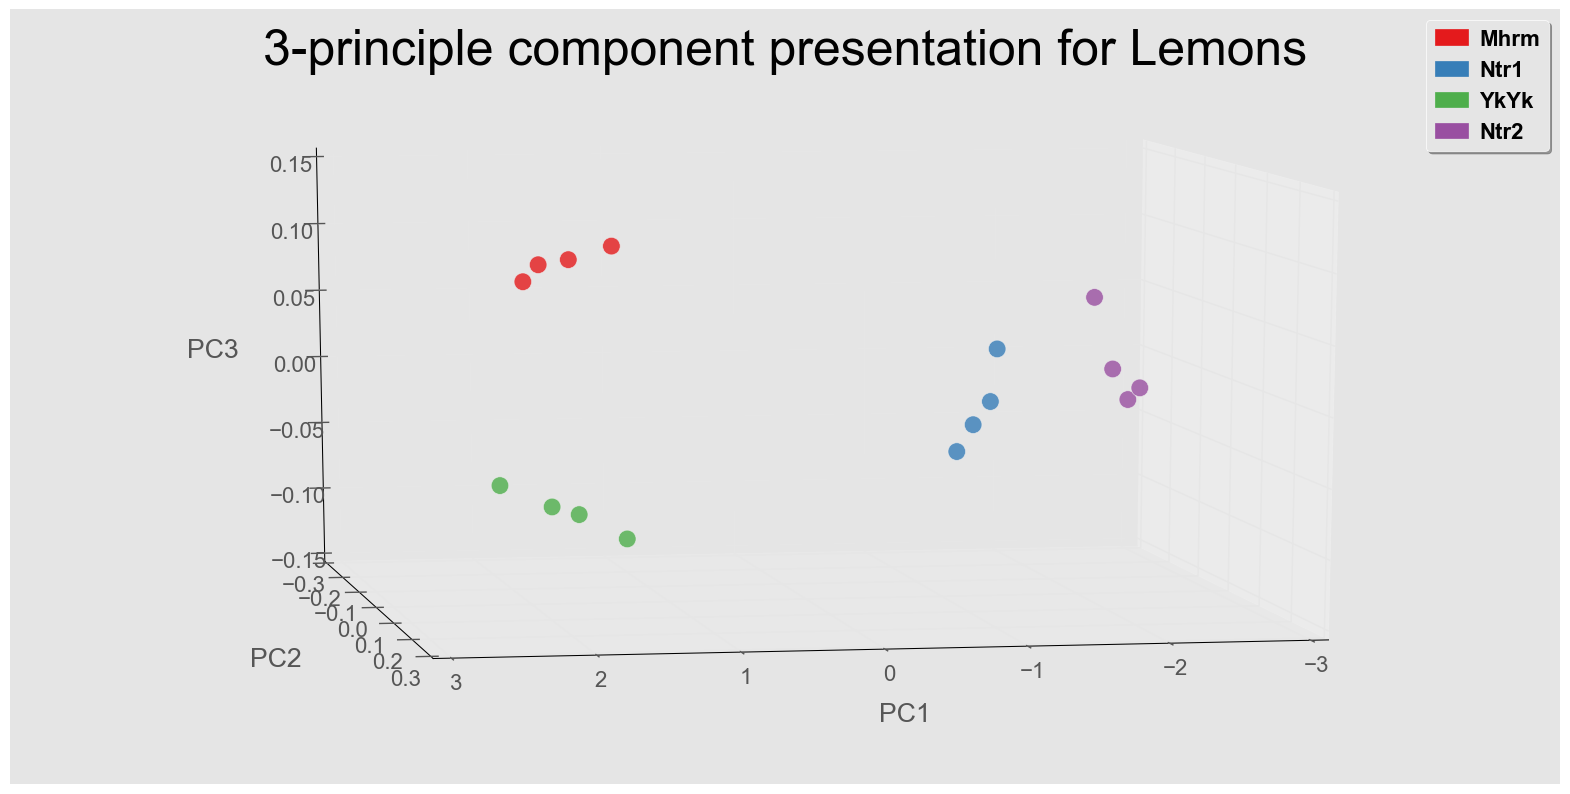

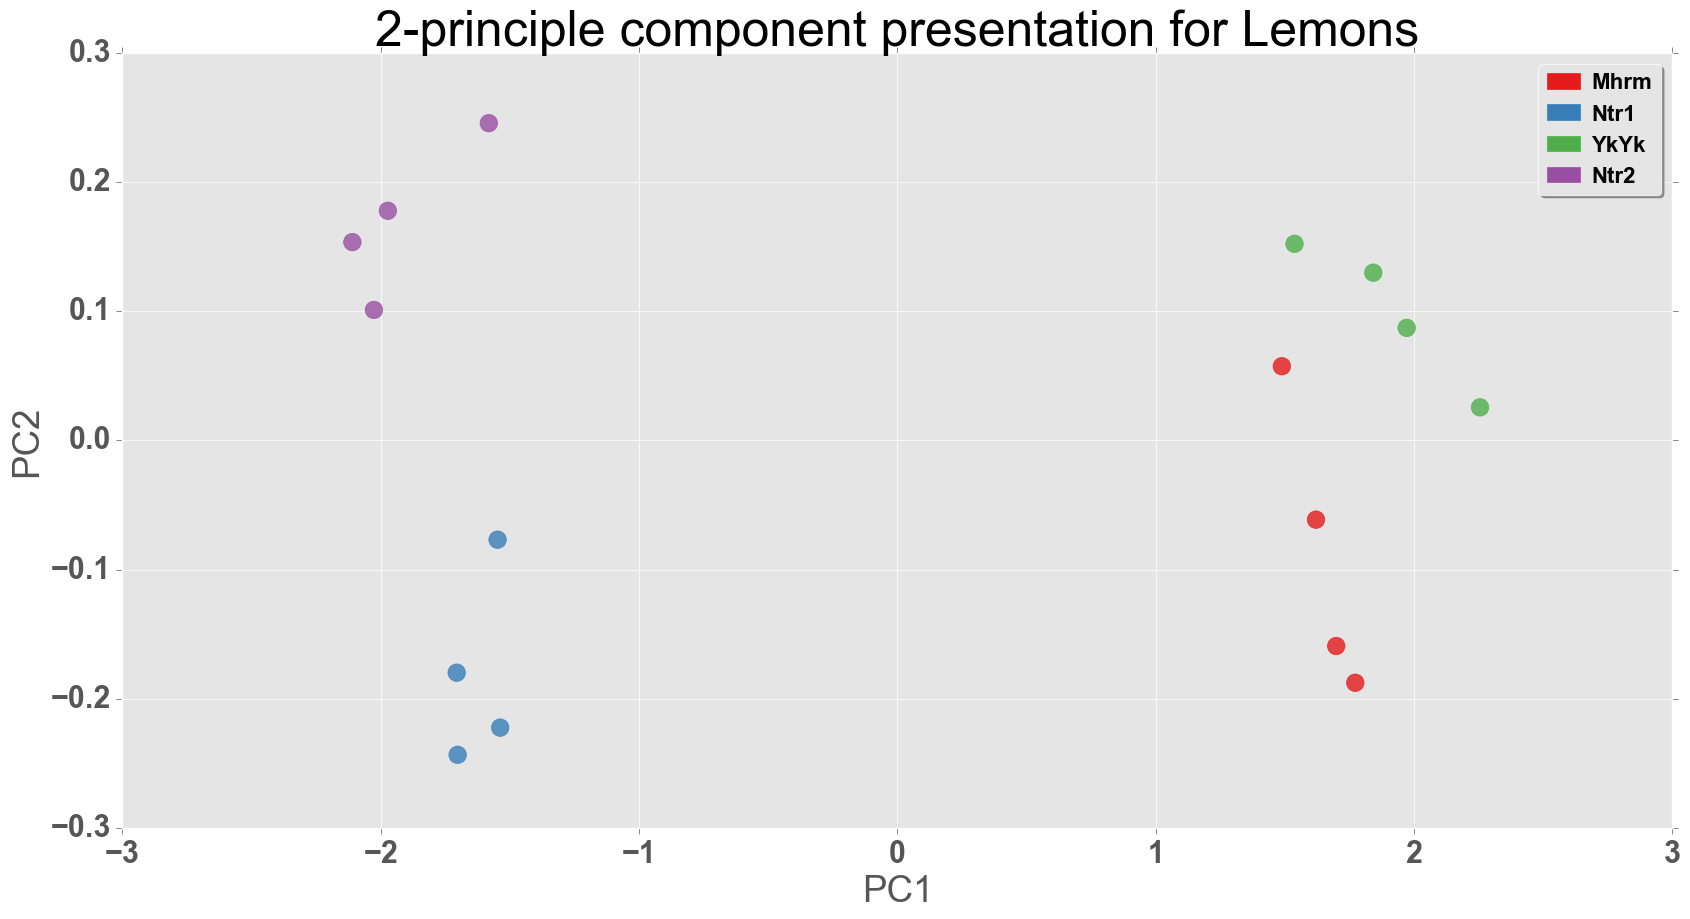

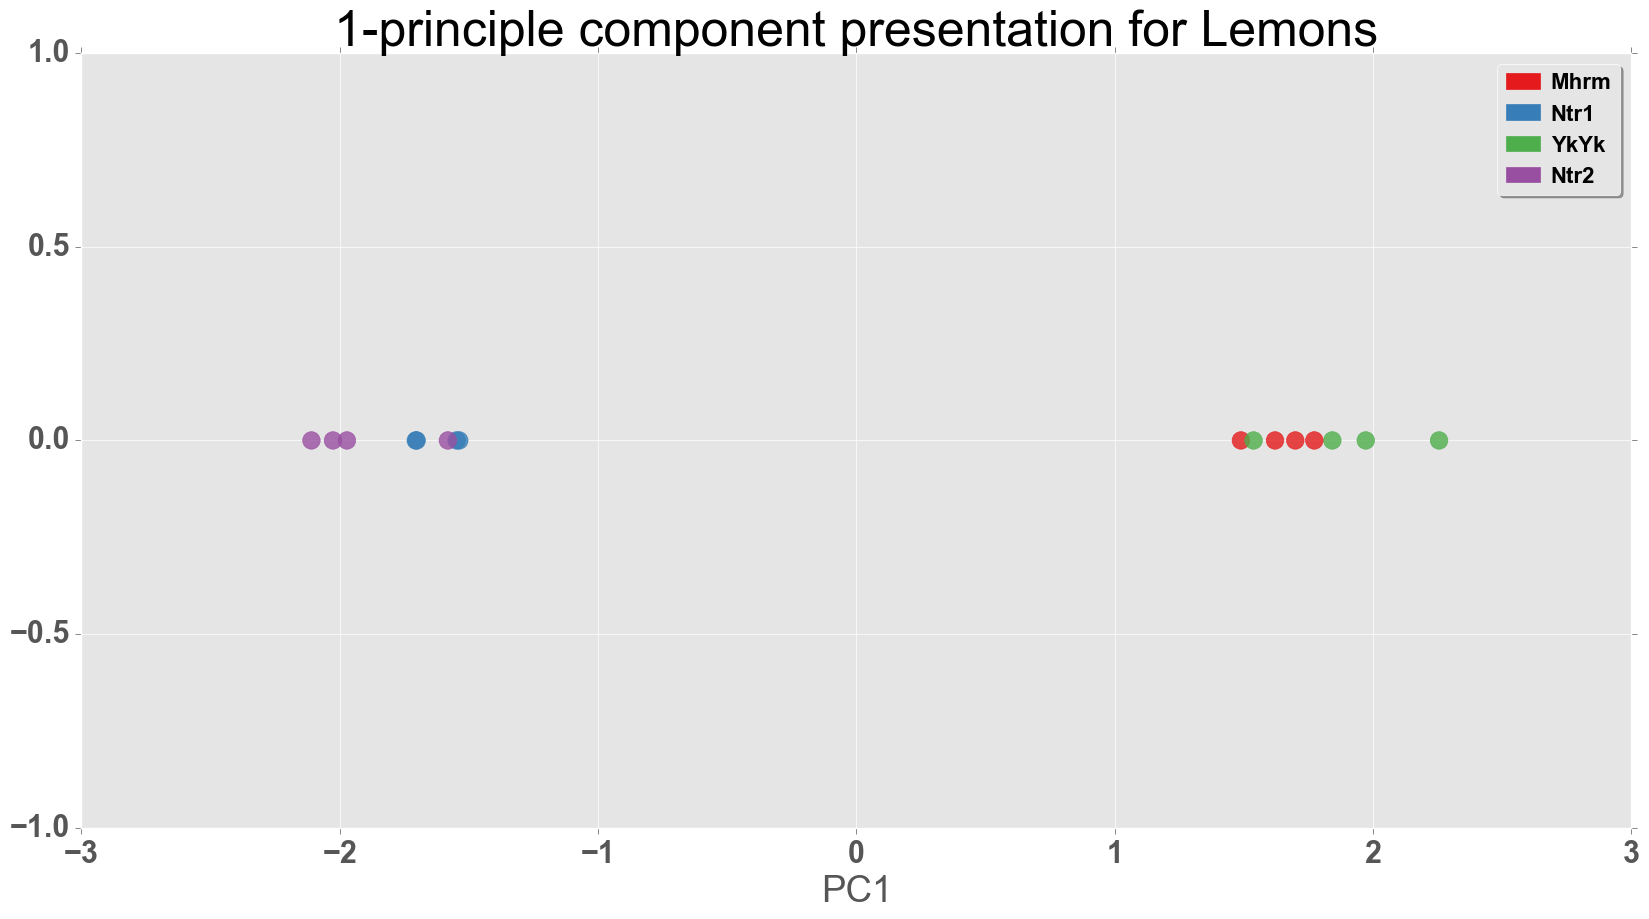

In [7]:
""" Plot """


lemons_3d_df = do_pca_3("Lemons")

# 3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
scatter_plot_smpl( ax, 3, lemons_3d_df, "3-principle component presentation for {0}".format("Lemons"), \
           "PC1", "PC2", "PC3", CLR_MAP, 'o', 160, 0.8, 10, 80 )
plt.show()

# 2D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter_plot_smpl( ax, 2, lemons_3d_df, "2-principle component presentation for {0}".format("Lemons"), \
           "PC1", "PC2", "", CLR_MAP, 'o', 160, 0.8, 0, 0 )
plt.show()

# 1D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter_plot_smpl( ax, 1, lemons_3d_df, "1-principle component presentation for {0}".format("Lemons"), \
           "PC1", "", "", CLR_MAP, 'o', 160, 0.8, 0, 0 )
plt.show()


Variance coverage of [x,y,z]:    [ 0.98910369  0.00751825  0.00136439]
Lemons:


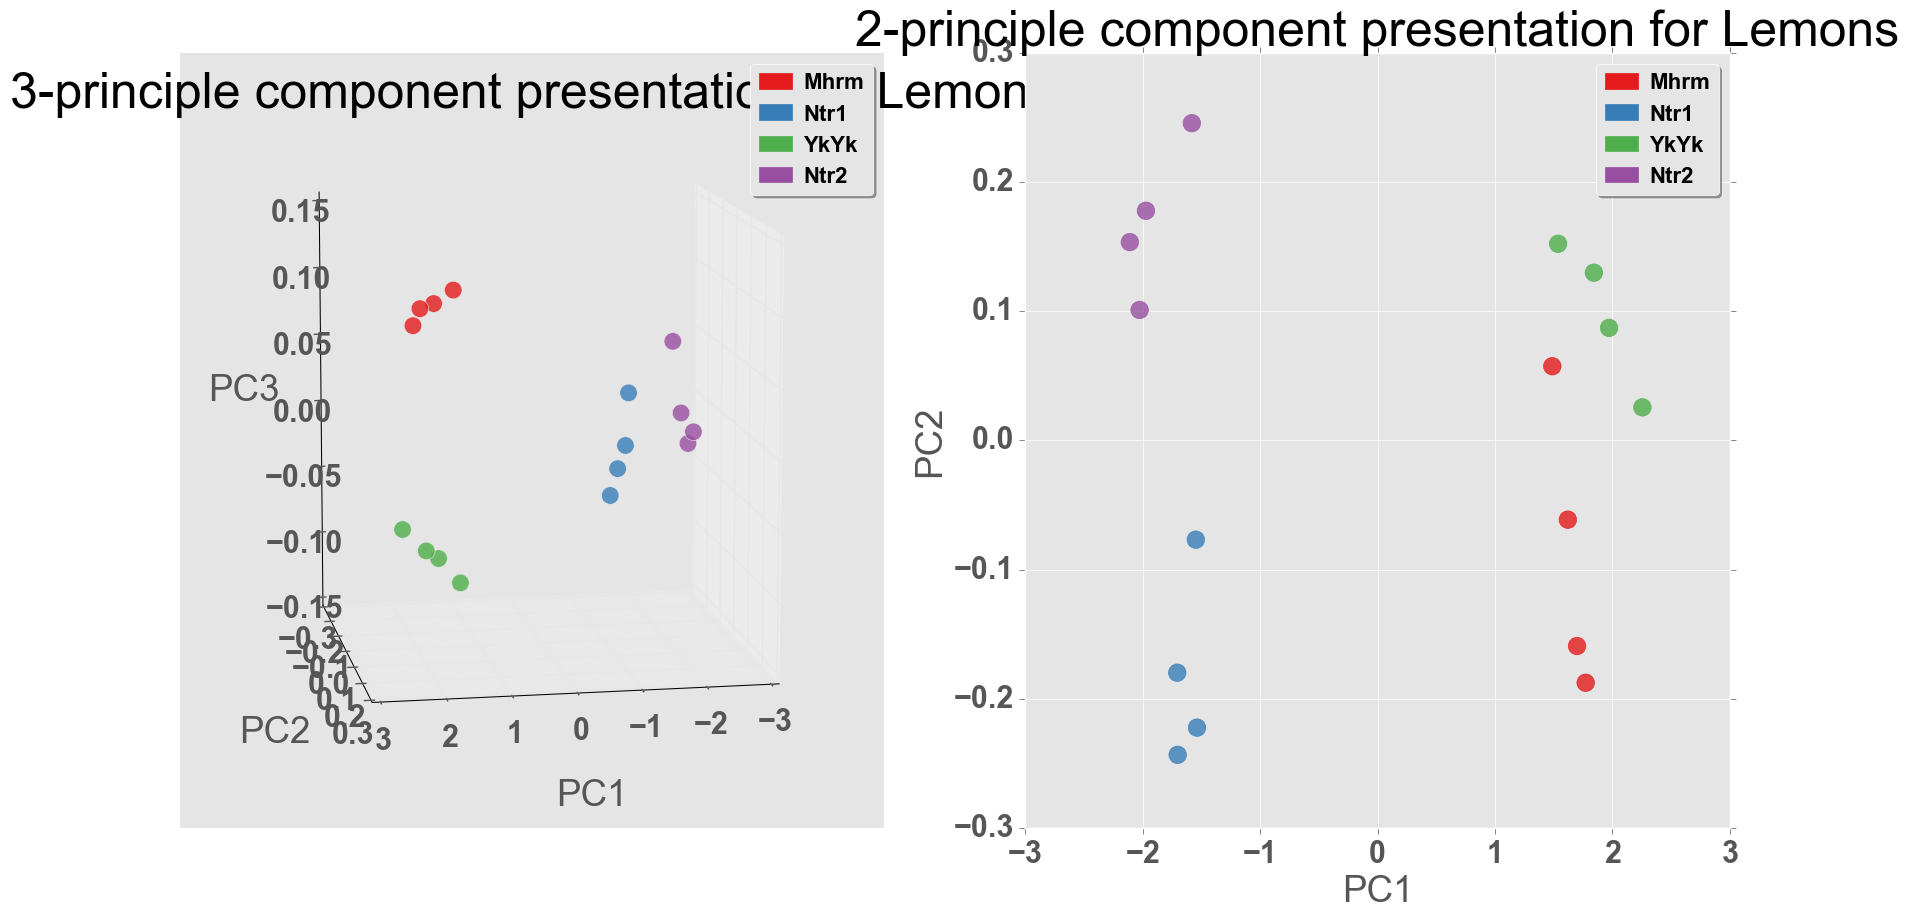




Variance coverage of [x,y,z]:    [ 0.98432193  0.01172527  0.00253123]
Oranges:


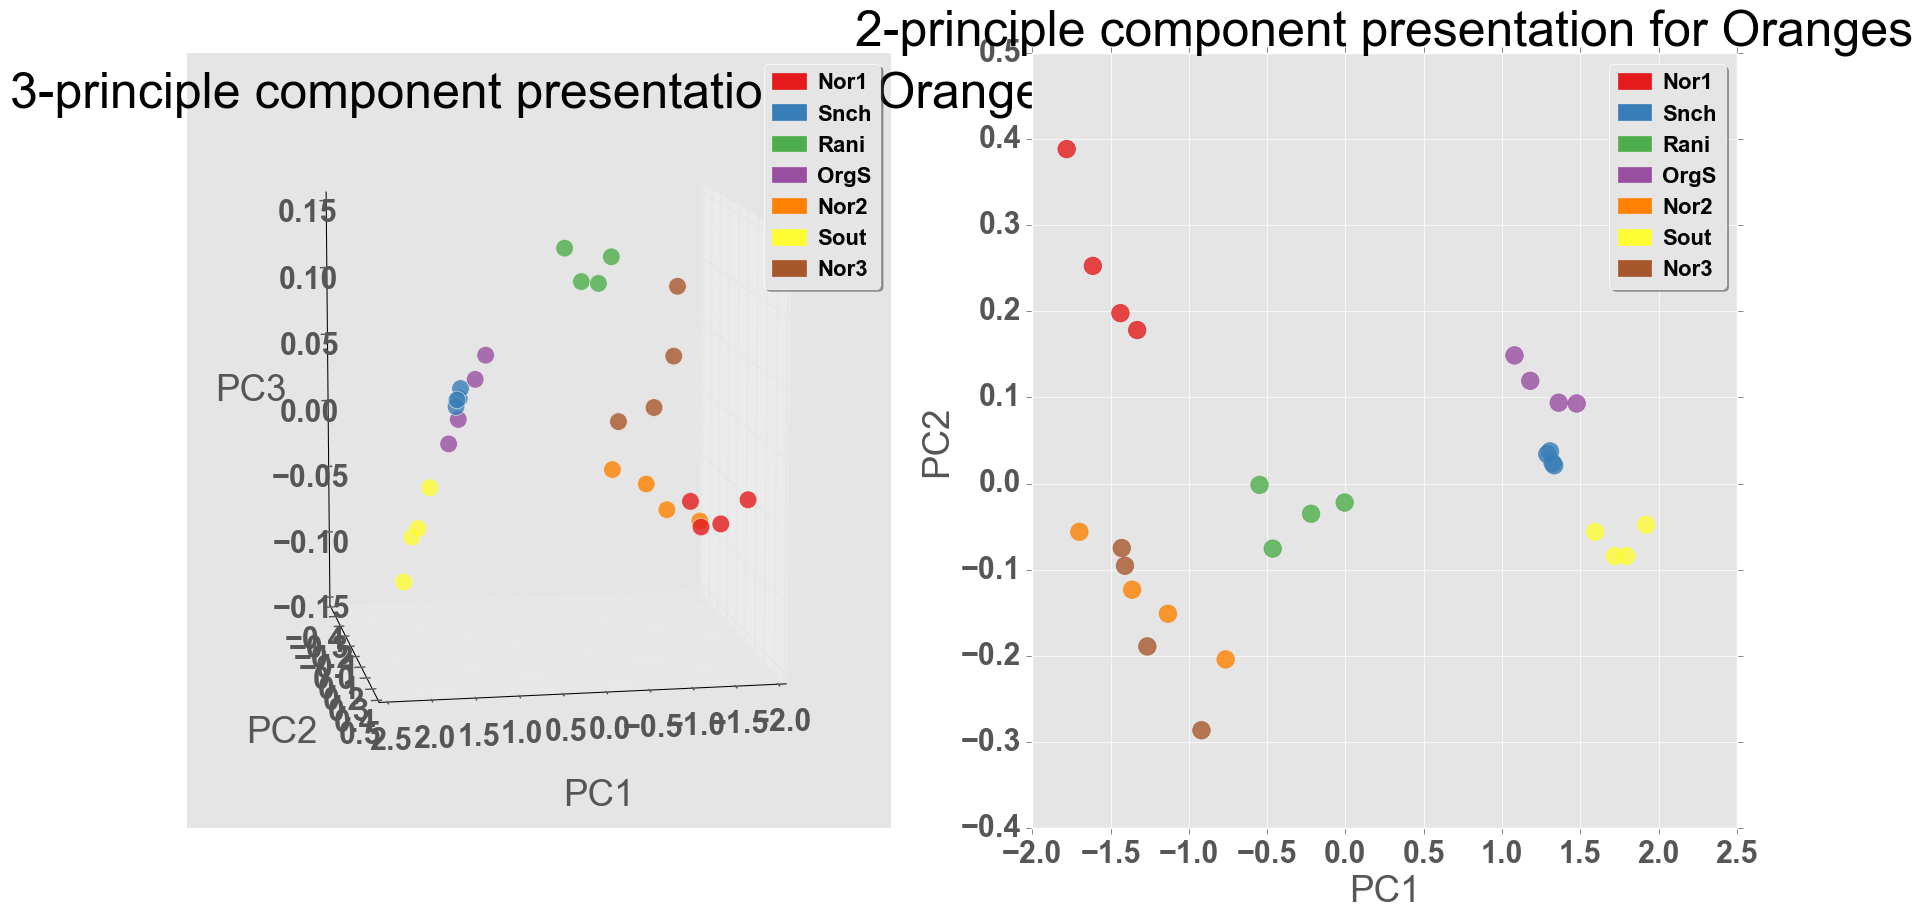




Variance coverage of [x,y,z]:    [ 0.78215093  0.17883812  0.00875732]
Milks 1:


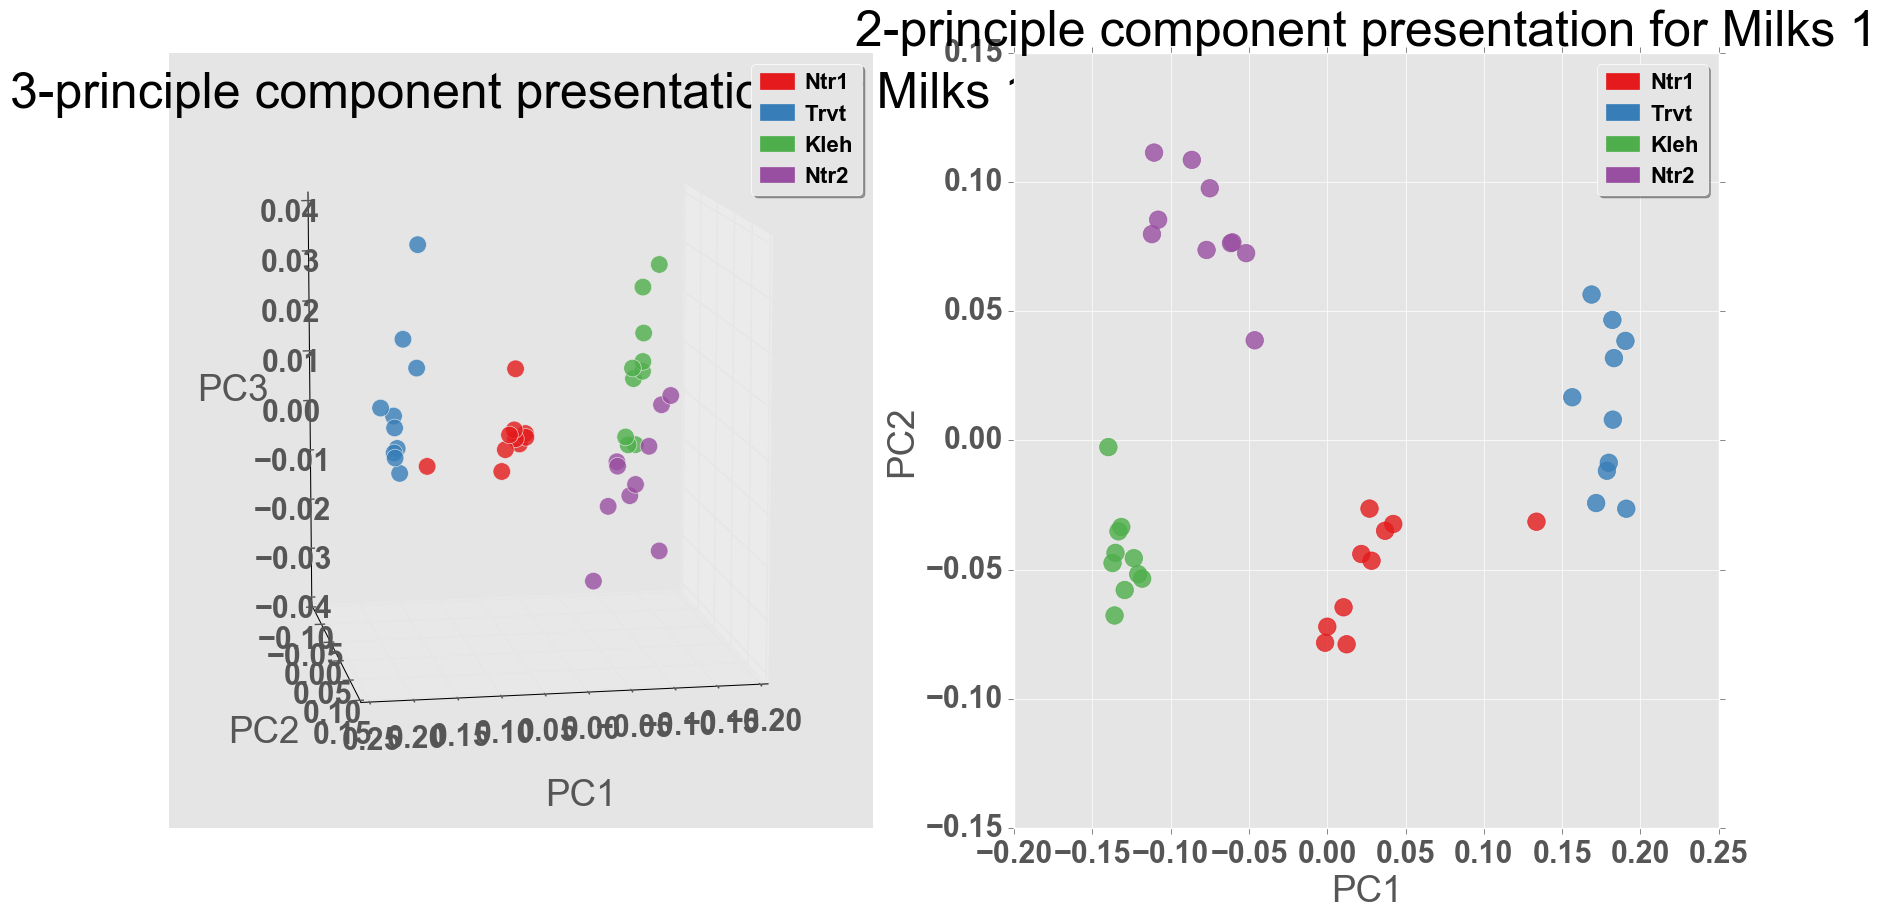




Variance coverage of [x,y,z]:    [ 0.78215093  0.17883812  0.00875732]
Milks 2:


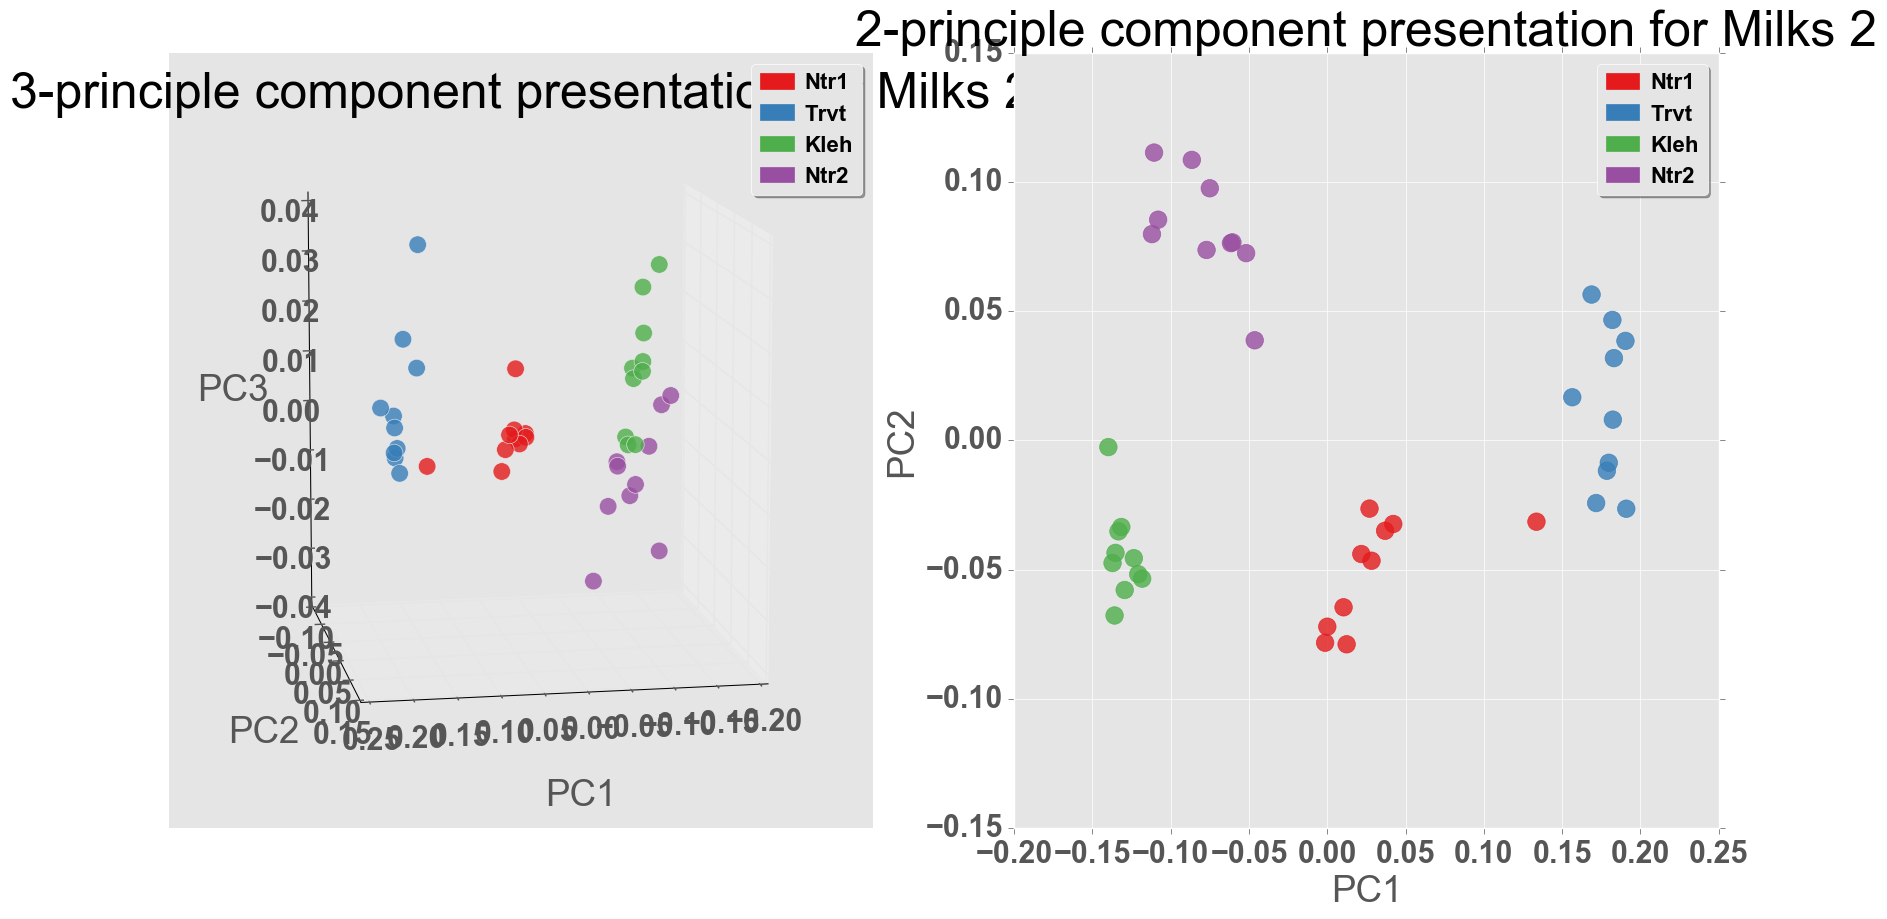

In [8]:
""" Plot all 3D and 2D """

dfs_dict = {}
for key, value in collected_dfs.items():   # We don't seem to use the value here!
    dfs_dict[key] = do_pca_3(key)   # a reduced 3D PCA df goes in as value of each key

    print (key + ":")
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(121, projection='3d')
    scatter_plot_smpl( ax, 3, dfs_dict[key], "3-principle component presentation for {0}".format(key), \
               "PC1", "PC2", "PC3", CLR_MAP, 'o', 160, 0.8, 10, 80 )
    # TODO: put the distance and azimuth values (last 2 params) in a dict for different keys, so we have suitable vals for each
    ax = fig.add_subplot(122)
    scatter_plot_smpl( ax, 2, dfs_dict[key], "2-principle component presentation for {0}".format(key), \
               "PC1", "PC2", "", CLR_MAP, 'o', 160, 0.8, 0, 0 )
    plt.show()
    print ("\n\n")

# TODO: Really clean up the plots: Oversized titles, tick-labels colliding with axes, a-bit-misplaced tick labels, legend pos,
        # azmiuth-dist optimization for 3D plots beside that of "Lemons", color map optim, switch milks1,2 (remove redundant one)
# TODO: They show up in random order, each time a different order! Ah, I guess it's the Hash-map iteration process. OK.


In [9]:
""" K-Means Clustering """




' K-Means Clustering '

In [10]:
""" Plotting with original groupings and assigned clusters """




' Plotting with original groupings and assigned clusters '